In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline


## For Simple, non-mathimatic EDA

In [13]:
df = pd.read_csv('./data/HR_Cleaned.csv')

df = df.drop(["EmpID", "MarriedID", "MaritalStatusID", "GenderID", "EmpStatusID", 
    "DeptID", "PositionID", "Zip", "CitizenDesc", "DateofHire", 
    "DateofTermination", "ManagerID", "LastPerformanceReview_Date"], axis = 1)
df.head()

,Employee_Name,PerfScoreID,FromDiversityJobFairID,Salary,Termd,Position,DOB,Sex,MaritalDesc,HispanicLatino,...,ManagerName,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,EmploymentDuration,On_Location
0,"Adinolfi, Wilson K",4,0,62506,0,Production Technician I,07/10/83,M,Single,No,...,Michael Albert,LinkedIn,Exceeds,4.60,5,0,0,1,4520,1
1,"Ait Sidi, Karthikeyan",3,0,104437,1,Sr. DBA,05/05/75,M,Married,No,...,Simon Roup,Indeed,Fully Meets,4.96,3,6,0,17,444,1
2,"Akinkuolie, Sarah",3,0,64955,1,Production Technician II,09/19/88,F,Married,No,...,Kissy Sullivan,LinkedIn,Fully Meets,3.02,3,0,0,3,447,1
3,"Alagbe,Trina",3,0,64991,0,Production Technician I,09/27/88,F,Married,No,...,Elijiah Gray,Indeed,Fully Meets,4.84,5,0,0,15,5795,1
4,"Anderson, Carol",3,0,50825,1,Production Technician I,09/08/89,F,Divorced,No,...,Webster Butler,Google Search,Fully Meets,5.00,4,0,0,2,1884,1


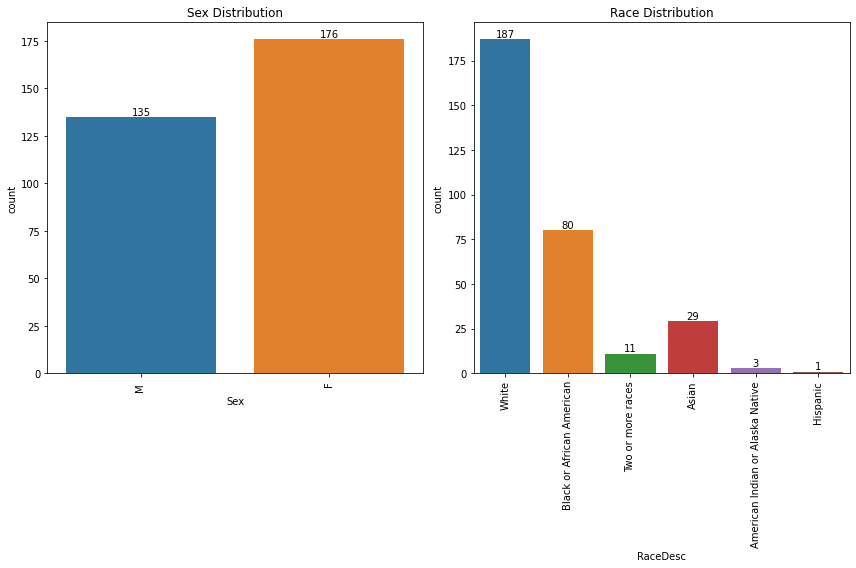

In [15]:
# Adding the counts on top of each bar in the Sex and Race distribution plots

# Creating a figure for the two graphs
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

# Plotting Sex Distribution and adding counts
sns.countplot(data=df, x='Sex', ax=axes[0])
axes[0].set_title('Sex Distribution')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)  # Rotating x-axis labels vertically
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                     textcoords='offset points')

# Plotting Race Distribution and adding counts
sns.countplot(data=df, x='RaceDesc', ax=axes[1])
axes[1].set_title('Race Distribution')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)  # Rotating x-axis labels vertically
for p in axes[1].patches:
    axes[1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                     textcoords='offset points')

plt.tight_layout()
plt.show()



**Sex Distribution:** Each bar representing a gender category now displays the total count of employees in that category.

**Race Distribution:** Similarly, each racial category bar is labeled with the total number of employees belonging to that race.

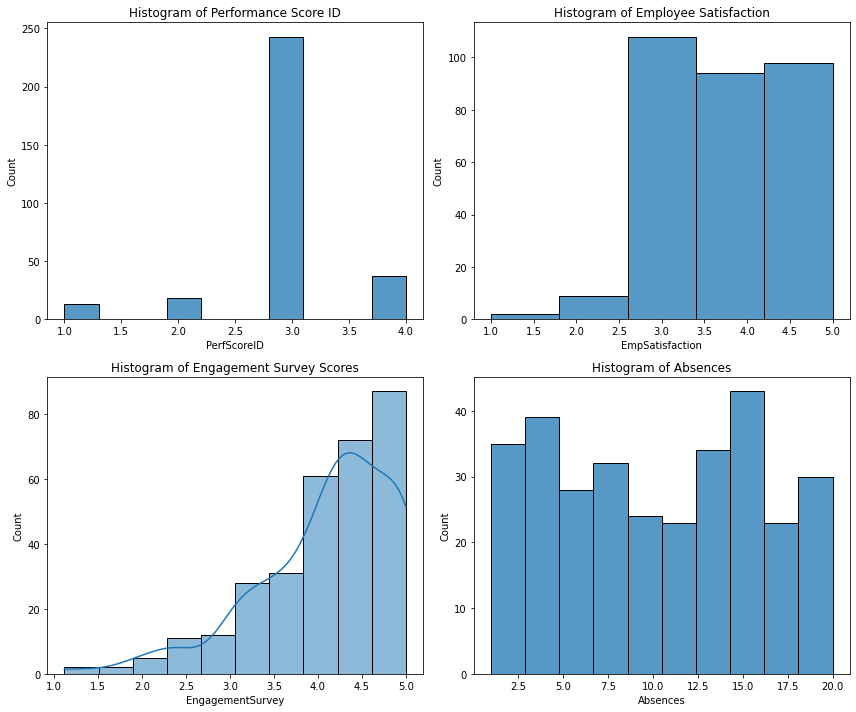

In [16]:
# Creating individual histograms for the specified columns

# Setting up the plotting area
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plotting histograms
sns.histplot(df['PerfScoreID'], bins=10, kde=False, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Performance Score ID')

sns.histplot(df['EmpSatisfaction'], bins=5, kde=False, ax=axes[0, 1])
axes[0, 1].set_title('Histogram of Employee Satisfaction')

sns.histplot(df['EngagementSurvey'], bins=10, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Histogram of Engagement Survey Scores')

sns.histplot(df['Absences'], bins=10, kde=False, ax=axes[1, 1])
axes[1, 1].set_title('Histogram of Absences')

plt.tight_layout()
plt.show()


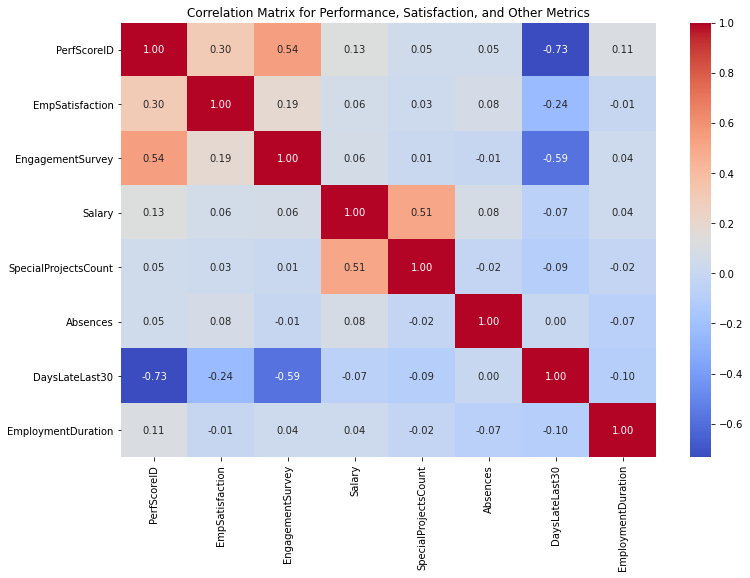

In [17]:
# Objective One: Identifying Trends Related to Increasing Performance and Satisfaction

# Correlation analysis to find relationships between performance scores, satisfaction, and other metrics
correlation_matrix = df[['PerfScoreID', 'EmpSatisfaction', 'EngagementSurvey', 'Salary', 
                                 'SpecialProjectsCount', 'Absences', 'DaysLateLast30', 'EmploymentDuration']].corr()

# Visualizing the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Performance, Satisfaction, and Other Metrics')
plt.show()


**Key Insights:**

 - **Positive Correlation Among Satisfaction, Engagement, and Performance:** Employees who are more engaged and satisfied with their work tend to perform better. This suggests that initiatives aimed at boosting engagement and satisfaction are likely to have a positive impact on performance.
   - Further, it becomes imperative to ensure that those in our workforce are doing well, mentally and emotionally

 - **Negative Correlation with Lateness:** The negative correlation between these positive factors and lateness underscores the importance of punctuality and reliability as indicators of employee commitment and professionalism.

There also appears to be a high correlation between those who are engaged in special projects and salary.  This could suggest that those who wish to increase their salaries could look into engaging special projects, if they find that to be a possibility for them and their position.

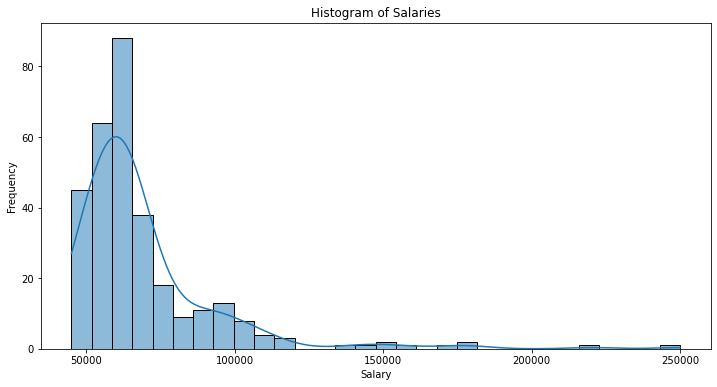

In [26]:
# Creating a histogram for the 'Salary' column
plt.figure(figsize=(12, 6))
sns.histplot(df['Salary'], bins=30, kde=True)
plt.title('Histogram of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

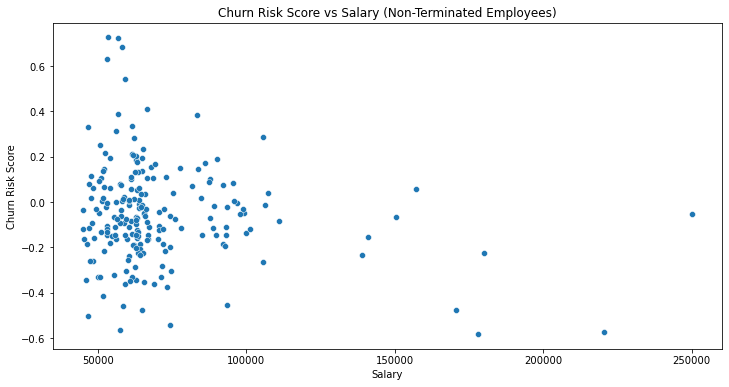

In [23]:
# Scatter plot to compare Churn Risk Score with Salary
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df[df['EmploymentStatus'].str.contains('Active')], x='Salary', y='ChurnRiskScore')
plt.title('Churn Risk Score vs Salary (Non-Terminated Employees)')
plt.xlabel('Salary')
plt.ylabel('Churn Risk Score')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned HR dataset
file_path_cleaned = 'path_to_your_dataset/HR_Cleaned.csv'  # Update with the correct path
df_cleaned = pd.read_csv(file_path_cleaned)

# EDA: Correlation Analysis
correlation_matrix = df_cleaned[['PerfScoreID', 'EmpSatisfaction', 'EngagementSurvey', 'Salary', 
                                 'SpecialProjectsCount', 'Absences', 'DaysLateLast30', 'EmploymentDuration']].corr()

# Visualizing the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Performance, Satisfaction, and Other Metrics')
plt.show()

# EDA: Visualizations
# Scatter plot for Salary vs Special Projects Count (Hue: Engagement Survey Score)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_cleaned, x='SpecialProjectsCount', y='Salary', hue='EngagementSurvey', palette='viridis')
plt.title('Salary vs Special Projects Count (Hue: Engagement Survey Score)')
plt.xlabel('Special Projects Count')
plt.ylabel('Salary')
plt.show()

# Scatter plot for Performance Score vs Days Late Last 30 Days (Size: Employee Satisfaction)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_cleaned, x='DaysLateLast30', y='PerfScoreID', size='EmpSatisfaction', sizes=(20, 200))
plt.title('Performance Score vs Days Late Last 30 Days (Size: Employee Satisfaction)')
plt.xlabel('Days Late Last 30 Days')
plt.ylabel('Performance Score ID')
plt.show()


In [ ]:
# Rename Column Options
new_names = ['list of new names in exact order']
new_names = {'old_name': 'new_name'}
df.columns = new_names

df.rename({
    'Old Name' : 'New_name'
}, axis = 1, inplace = True)

In [ ]:
df[''].fillna()

In [ ]:
mask = df['column'] <>!= something
df = df[mask]

In [ ]:
df.drop([], axis = 1)#inplace = True)

In [ ]:
def map_funct(cell):
    return cell

In [ ]:
df[''] = df[''].map(lambda x:)#map_funct(x))

In [ ]:
#org_qualitative_col  = df['org_qualitative_col']
df = pd.get_dummies(df)
#df['org_qualitative_col'] = org_qualitative_col

In [ ]:
# Natural Language Processing libraries, initiations and functions
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.decomposition import LatentDirichletAllocation
import re # Delete this if scraping in same notebook

def preprocess(text):
    text = re.sub(r'[^a-zA-Z]',' ', text.lower())
    tokens = word_tokenize(text)
    lemmer = WordNetLemmatizer()
    stop_words = stopwords.words("english")
    return " ".join([lemmer.lemmatize(word) for word 
                     in tokens if len(word) > 1 and not word in stop_words])
cvec = CountVectorizer(analyzer = "word",
                       min_df = 2,
                       preprocessor = preprocess,
                       stop_words = 'english')
#pd.DataFrame(cvec.fit_transform(df['COLUMN']).todense(), columns=cvec.get_feature_names())

def LDA(input_item, num_topics = 3, num_words = 5, pre_cveced = False):
    # Cols are the words. Rows are the topics
    topic_lists = []
    lda = LatentDirichletAllocation(n_components=num_topics, learning_method='online')
    
    if  pre_cveced == False: # For inserting a column and automatically cvecing things in function.
        lda.fit(cvec.fit_transform(input_item))
    elif pre_cveced == True: # For inserting a pre-cveced dataframe.
        lda.fit(input_item)
    else:
        print("Not good pre_cveced option given.")
    for ix, topic in enumerate(lda.components_):
        topic_lists += [[cvec.get_feature_names()[i] for i 
                         in lda.components_[ix].argsort()[:-num_words - 1:-1]]]

    return pd.DataFrame(topic_lists, columns=[ 'word_' + str(i) for i 
                                    in range(1, num_words+1)], index=range(1, num_topics + 1)) 


def Sentamentize(text):
    return TextBlob(str(text)).sentiment.polarity

In [ ]:

df.dtypes# Return column data types
df.describe() #(returns count, mean, std, min, and %iles)???
df.info()
df['col1'].std() # Standard Deviation


# Main ways to adjust indexes
df.reset_index(inplace=True)
df.set_index('column', inplace = True)
df = df.reindex(['cols'], axis = 1)



# Concat
the_dfs = [df_one,df_two]
df_main = pd.concat(the_dfs, sort=False, axis = 1)

# Dropping columns with "Errors"
mask = df['col'] == 'Error'
df.drop(df[mask].index, inplace = True)

# Dropping Duplicates
df.drop_duplicates(inplace = True)

# Map Function Starter
def map_funct(cell):
    return cell
df['column'] = df['column'].map(lambda x: map_funct(x))


# Masks
mask = df['column'] <=> something 
df = df[mask]

df[~mask] (Select opposite of the mask)
df[(df['col1'] > num) & (df['col2'] < num)]
df[(df['col1'] > num) | (df['col2'] > num)]
df[ df['col'].isin([num, num]) ] #return rows with specific values(?)

### EDA

In [ ]:
# Basic EDA

df.dtypes                           # Data Types of cols
df.column.unique()                  # Unique Values in col
df.describe().T                     # Summary Stats
df.info                             # Info
df['column'].value_counts(normalize=True)

In [ ]:
| Thing             | Main Matplotlib               | Sub Plt               | Seaborn                           |
|-------------------|-------------------------------|-----------------------|-----------------------------------|
| Idea              | + to plt each line            |fig, ax = plt.subplots(ncols, nrows) (ax[#,#] for ea plt)| |
| Bar               | plt.bar(x, height)            |                       |                                   |
| Histagram         | plt.hist(x, bins)(Lists Args) |                       |                                   |
| Scatter           | plt.scatter(x, y)    (Args)   |                       |                                   |
| Line Graph        | plt.plot([y's_ea_x(#,#)(#,])  | ax[#]plot()           | sns.lineplot(x,y)(Args)           |
| FacetGrid (Chi2)  |                               |                       | sns.FacetGrid(df, col, row)       |
| ...define inr plts|                               |                       |.map(plt.graph, bins, range)       |
| X/Y Labels        | plt.zlabel("")                | ax[#].set_xlabel()    |                                   |
| Title             | plt.title("")                 | ax[#].set_title()     |                                   |
| Figure Size       | plt.figure(figsize)           | plt.subplots(figsize) |                                   |
|Customize X/Y Ticks| plt.zticks([labels], rotation)|
| Add a Line        | plt.axvline(x)                |
| Set Z Value Limit | plt.gca().set_zlim([#,#])     |
| Add Legend        | plt.legend()                  |


The six "lessons" of visualizing data.
 - Lesson 1: Understand the context. (Who, What, How)
 - Lesson 2: Choose an appropriate visual display. (What type of graph?)
 - Lesson 3: Eliminate clutter. (What can I delete or make more subtle?)
 - Lesson 4: Focus attention where you want it. (How do I emphasize important things?)
 - Lesson 5: Think like a designer. (How do I organize my visualization?)
 - Lesson 6: Tell a story! (How do I communicate my visualization?)


-------------------------------------------

## Set Up Options

# import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Color Options
colors = {'blue': '#729ECE',
          'brown': '#A8786E',
          'green': '#67BF5C',
          'grey': '#A2A2A2',
          'orange': '#FF9E4A',
          'pink': '#ED97CA',
          'purple': '#AD8BC9',
          'red': '#ED665D',
          'teal': '#6DCCDA',
          'yellow': '#CDCC5D'}

# Style Options
sns.set_style('darkgrid')
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')


# Basic Non-Visual EDA

df.dtypes                           # Data Types of cols
df.column.unique()                  # Unique Values in col
df.describe().T                     # Summary Stats
df.info                             # Info
df['column'].value_counts(normalize=True)

# Correlations between two seperate columns w/o a whole thing
print(np.corrcoef(df['column_1'].values, df['column_2'].values))

# SCATTER


## PLT
plt.figure(figsize=(10, 10))
plt.scatter(y = df['column_one'],
            x = df['column_two'],
            color = colors);

## PD
df.plot('math', 'num_awards', kind = 'scatter')


## SNS Dirty
axes = plt.gca()
axes.set_xlim([-1,35])
axes.set_ylim([-1,35])
sns.scatterplot(df['column_one'], df['column_two'], hue= df['column_three'], alpha = 0.1);

# BOXPLOT

## SNS
sns.boxplot(df['column'],
            data = df
                orient='v' or 'h',
                fliersize=8,
                linewidth=#,
                notch = True,
                saturation=0.5,
                ax=ax,
                by = "column?");

# LINEPLOT

sns.lineplot(data = df);

====================================================
# HISTAGRAM

## PLT
plt.hist(df['column'], bins = 10, color='g', alpha = 0.1);
plt.xlabel("Label", position = (0,0), ha = 'left', color = 'grey') # (x,y)
plt.ylabel("label", position = (0, 1), ha = 'right', color = 'grey'); # (x,y);

## PLT.plot
figure, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (15,15))
test_df['column_one'].plot(ax = ax[0], kind = 'hist')
test_df['column_two'].plot(ax = ax[1], kind = 'hist');

## PD
df.plot(x='col1', y='col2', title="Title")
df.hist('col');

## SNS Countplot
sns.countplot(raw_df['col']);
##Also
sns.countplot(x="col", data=df);

------------
# Other Example DIRTY
plt.hist(df['col1'],bins= len(df['col1'].unique()));


====================================================
# BARPLOT

## PLT
plt.figure(figsize = (16,6))
plt.bar(height = df['Column?'],  # List of numbers?
        x = df.columns);

## SNS
sns.barplot(data = df,
            x = "column_one",
            y = "column_two");




====================================================
# PAIRPLOT

sns.pairplot(df, kind = "reg", 
             hue = 'column',
             plot_kws = {'line_kws' : {'color' : 'red'}, 
                         'scatter_kws' : {'alpha' : 0.1}})
             # Alt
             # plot_kws={'alpha': 0.05});

# With specific rows, only
sns.pairplot(data=temp_df,
            x_vars=['col1'],
            y_vars=['col2'])


====================================================
# HEATMAP

# SNS
#plt.figure(figsize= (9,9))
sns.heatmap(df.corr(), 
            cbar=False, 
            linewidths= .01, 
            linecolor='black', 
            cmap=sns.color_palette("Purples"),
            annot=True);


=======================================================
# Jointplot
sns.jointplot(y_test, lin_reg.predict(X_test))

=======================================================
# Facet Grid
Grid = sns.FacetGrid(df, col="Col1", row="col2", margin_titles=True)
Grid.map(plt.hist,'col2?', bins = num, range = (num,num));

=======================================================
# Graph Alterations
# Colors: plt.colors.cnames

# For layering on top:
plt.hist(df['column_1'], color='g')
plt.hist(df['column_2'], color='b')

# For layering next to:
fig, ax = plt.subplots(2, 
                    sharex = True,  # Scale x together
                    sharey = True,    
                   figsize = (1,1)) # Size
ax[0].hist(df['column_1'],          # 
           bins = 10,               # Bins
           color='b',               # Color
           alpha = 0.5,             # Transparancy
           label = 'col_1')         # For .legend()
ax[1].hist(df['column_2'])          # 

# Subplot Example

fig, axes = plt.subplots(3, figsize = (20,10))
sns.countplot(df['col'], ax= axes[0])
sns.countplot(df['col'], ax = axes[1])
sns.countplot(df['col'], ax = axes[2]);

# Labels for Words
plt.xlabel("measure",               # Alt: .ylabel
           position = (0,0),        # (x-pos, y-pos)?
           ha = 'left',             # Horizontal
           color = 'grey') # (x,y)

plt.legend()
plt.title()                         # Title ~= Subtitle
plt.suptitle("subtitle\n.",         # Subtitle
             position = (0,1),      # Position
             ha = 'left',           # Horizontal
             fontsize=16,           # Size, Font
             va = 'top');           # Vertical


# Shifting Graph Coordinates (in a Scatter plot)
axes = plt.gca()
axes.set_xlim([num_one,num_two])
axes.set_ylim([num_one,num_two])
sns.scatterplot(df['column_one'], df['column_two']);